__Energy Efficiency Classification Analysis__

Importing Libraries and Reading our Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('energy_efficiency_data.csv')

In [15]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,HeatClass,CoolClass
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,2


Its a classification problem so we need to change our target variables from nominal values to classes. The classes will be Low = 0,
Medium = 1,
High = 2. 
We do that by splitting our data into three Bins in the following way: 
 0%-33%,33%-66%,66%-100% 

In [16]:
df['Heating_Load'].describe()

count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating_Load, dtype: float64


In [5]:
heat_bins = [0, 15, 24.5, 43.1]

In [6]:
df['Cooling_Load'].describe()
cool_bins = [0,18.5,27.5,48.03]

In [7]:
temp_labels = [0, 1, 2]
df['HeatClass'] = pd.cut(df['Heating_Load'], bins=heat_bins, labels=temp_labels)
df['CoolClass'] = pd.cut(df['Cooling_Load'], bins=cool_bins, labels=temp_labels)

In [17]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,HeatClass,CoolClass
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,2


EDA

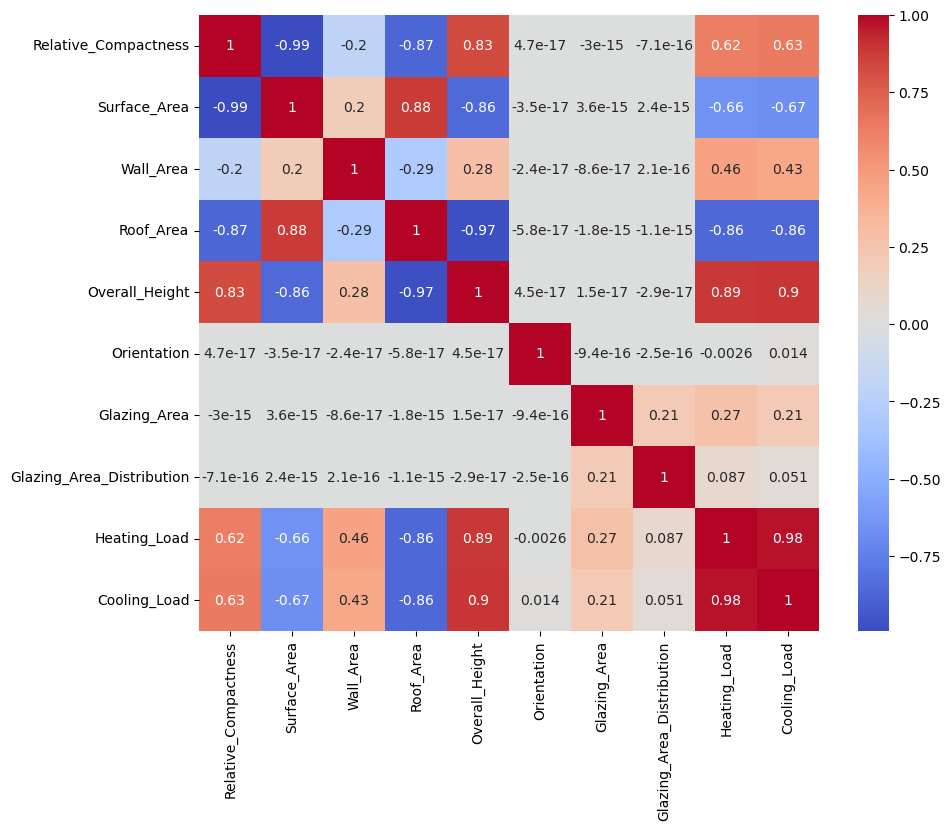

In [9]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax = ax)
plt.show()

We see that one of the features with the biggest correlations to the heating and cooling classes of our data is the overall height of the structures.

We will now Scale and Split our Data so it is suitable for feeding into our Models

In [10]:
x = df.drop(columns=['Heating_Load','Cooling_Load','HeatClass','CoolClass'])
yh= df['HeatClass']
yc = df['CoolClass']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, yh_train, yh_test = train_test_split(x, yh, test_size=0.25, random_state=42)
X_train, X_test, yc_train, yc_test = train_test_split(x, yc, test_size=0.25, random_state=42)

Desicion Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT_classifer = DecisionTreeClassifier()
DT_classifer.fit(X_train, yh_train)
DT_y_pred = DT_classifer.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(yh_test, DT_y_pred)))

Model accuracy score with criterion entropy: 98.96%


Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, yh_train)
rf_y_pred = rf_classifier.predict(X_test)
print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(yh_test, rf_y_pred)))

Model accuracy score with criterion entropy: 98.96%
